In [1139]:
import numpy as np
import pandas as pd


In [1140]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\K\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1141]:
loan_data = loan_data_backup.copy()

In [1142]:
pd.options.display.max_columns = None

In [1143]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1144]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### Data Preprocessing

In [1145]:
# String to Numeric
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [1146]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

<ipython-input-1146-ef73dc274f43>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [1147]:
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [1148]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [1149]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [1150]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')

In [1151]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [1152]:
# String to Date
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [1153]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [1154]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1155]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [1156]:
loan_data['mthns_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [1157]:
loan_data['mthns_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mthns_since_earliest_cr_line, dtype: float64

In [1158]:
# problem: 1960 turned into 2060
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mthns_since_earliest_cr_line']][loan_data['mthns_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mthns_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [1159]:
loan_data['mthns_since_earliest_cr_line'][loan_data['mthns_since_earliest_cr_line'] < 0] = loan_data['mthns_since_earliest_cr_line'].max()

<ipython-input-1159-321ef699da61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mthns_since_earliest_cr_line'][loan_data['mthns_since_earliest_cr_line'] < 0] = loan_data['mthns_since_earliest_cr_line'].max()


In [1160]:
min(loan_data['mthns_since_earliest_cr_line'])

73.0

In [1161]:
# Categorical Variable prerpocessing
# k-1 dummy variables to represent k categories

In [1162]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [1163]:
pd.get_dummies(loan_data['grade'], prefix = 'grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [1164]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep = ':')
                    ]

In [1165]:
loan_data_dummies = pd.concat(loan_data_dummies,axis = 1)

In [1166]:
# pd.concat  axis = 0 by rows,    axis = 1 by columns
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [1167]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [1168]:
import missingno as msno

In [1169]:
# Missing Values
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mthns_since_earliest_cr_line,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [1170]:
# msno.bar(loan_data)
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [1171]:
pd.options.display.max_rows = 100


In [1172]:
# df = df.dropna() drop NA rows
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [1173]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

## PD model

In [1174]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [1175]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [1176]:
bad = ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off' ,'Late (31-120 days)' ]
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(bad), 0, 1) # 0 if default, 1 if non-default



In [1177]:
# independent variables
# weight of evidence: to what extent an independent variable would predict a dependent variable
# Information Value: shows how much info the original independent variable brings with respect to explaining the dependent variable
# greater IV = much information
# Information value for pre-select independent variables




## Splitting Data

In [1178]:
from sklearn.model_selection import train_test_split

In [1179]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 318465      318465  25297044   27749824       8500         8500   
 28244        28244    541273     698694       2500         2500   
 319229      319229  25166663   27609495      16000        16000   
 420741      420741  11644891   13617034      35000        35000   
 213065      213065   1350040    1594435      16000        16000   
 ...            ...       ...        ...        ...          ...   
 374792      374792  15159126   17231575      19650        19650   
 103954      103954   6647674    8229789      12000        12000   
 128299      128299   5784623    5473746      24000        24000   
 343165      343165  21380548   23693444      20875        20875   
 363144      363144  19617524   21840236       9475         9475   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 318465           8500.0   36 months      8.39       267.90     A        A5   
 28244            2500.0

In [1180]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [1181]:
loan_data_inputs_train.shape

(373028, 205)

In [1182]:
loan_data_targets_train.shape

(373028,)

In [1183]:
loan_data_inputs_test.shape

(93257, 205)

In [1184]:
loan_data_targets_test.shape

(93257,)

## Data Preparation- feature selection

In [1185]:
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train

df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [1186]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [1187]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [1188]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [1189]:
df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962338
1,B,0.923085
2,C,0.882905
3,D,0.844314
4,E,0.805178
5,F,0.775472
6,G,0.697605


In [1190]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0],as_index = False)[df1.columns.values[1]].mean() ], axis = 1)

In [1191]:
df1 = df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [1192]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [1193]:
df1

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [1194]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [1195]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good'])* df1['n_obs']

In [1196]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0
1,B,27199,0.923085,0.291656,25107.0,2092.0
2,C,25048,0.882905,0.268591,22115.0,2933.0
3,D,15390,0.844314,0.165028,12994.0,2396.0
4,E,7145,0.805178,0.076616,5753.0,1392.0
5,F,2699,0.775472,0.028942,2093.0,606.0
6,G,668,0.697605,0.007163,466.0,202.0


In [1197]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823


In [1198]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323


In [1199]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)

In [1200]:
df1


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469


In [1201]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683


In [1202]:
# information value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


## Preprocessing Deiscrete Variables: Automating Calculations

In [1203]:
def woe_discrete(df,discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean() ], 
                   axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad']) # Weight of evidence
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [1204]:
df_temp = woe_discrete(df_inputs_prepr, 'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


## Preprocessing Discrete Variables: Visualizing Results

In [1205]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1206]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o',linestyle = '--',color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

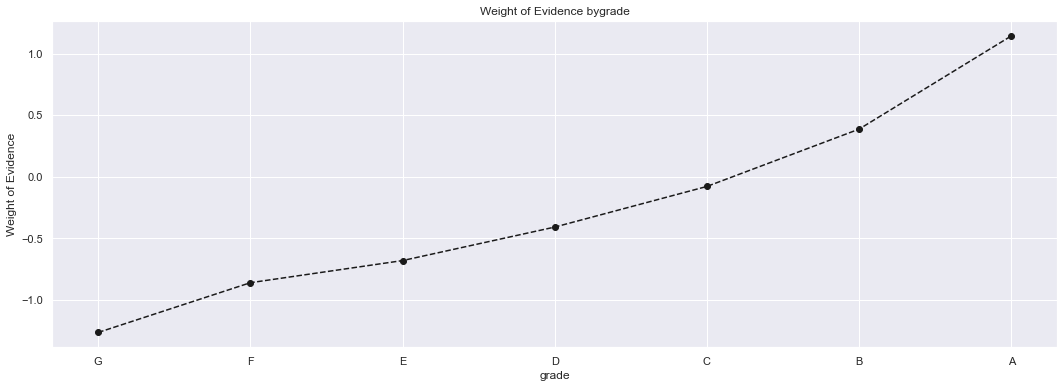

In [1207]:
plot_by_woe(df_temp)

## Preprocessing Discrete Variables-home_ownership

In [1208]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


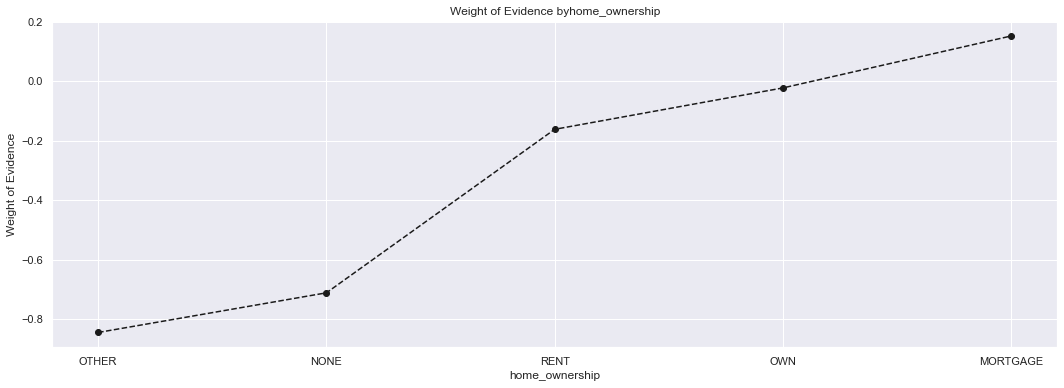

In [1209]:
plot_by_woe(df_temp)
# Home_ownership: OTHER, NONE,ANY -> RENT
# Combining categorices together

In [1210]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:ANY'],
                                                            df_inputs_prepr['home_ownership:NONE']])

## Preprocessing Discrete Variables-addr_state

In [1211]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [1212]:
df_temp = woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

C:\Users\K\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


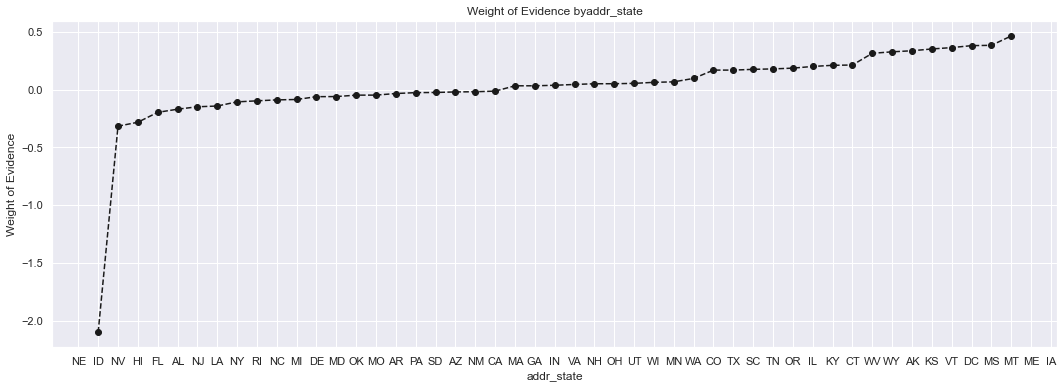

In [1213]:
plot_by_woe(df_temp)

In [1214]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

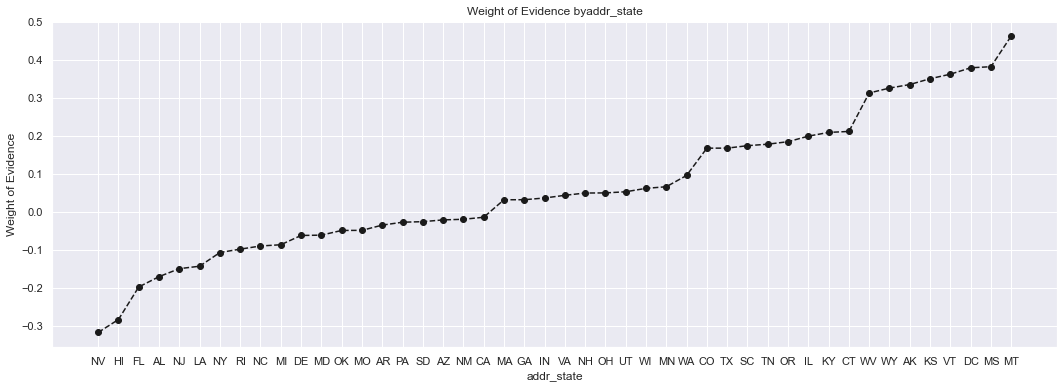

In [1215]:
plot_by_woe(df_temp.iloc[2:-2,:])

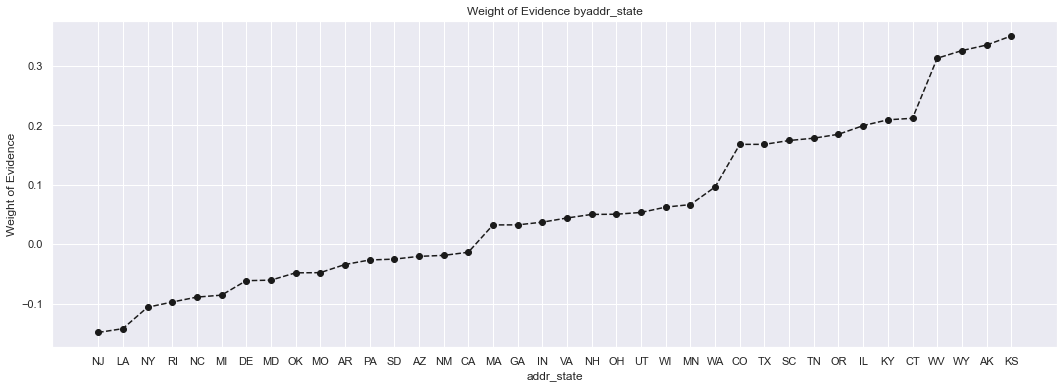

In [1216]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [1217]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'],
                                                         df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'],
                                                         df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'],
                                                         df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],
                                                         df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],
                                                         df_inputs_prepr['addr_state:TN'],
                                                         df_inputs_prepr['addr_state:MO'],
                                                         df_inputs_prepr['addr_state:LA'],
                                                         df_inputs_prepr['addr_state:MD'],
                                                         df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],
                                                         df_inputs_prepr['addr_state:KY'],
                                                         df_inputs_prepr['addr_state:AZ'],
                                                         df_inputs_prepr['addr_state:NJ']])
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],
                                                         df_inputs_prepr['addr_state:MI'],
                                                         df_inputs_prepr['addr_state:PA'],
                                                         df_inputs_prepr['addr_state:OH'],
                                                         df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'],
                                                         df_inputs_prepr['addr_state:MA'],
                                                         df_inputs_prepr['addr_state:DE'],
                                                         df_inputs_prepr['addr_state:SD'],
                                                         df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],
                                                         df_inputs_prepr['addr_state:WA'],
                                                         df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'],
                                                         df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],
                                                         df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],
                                                         df_inputs_prepr['addr_state:SC'],
                                                         df_inputs_prepr['addr_state:CO'],
                                                         df_inputs_prepr['addr_state:VT'],
                                                         df_inputs_prepr['addr_state:AK'],
                                                         df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],
                                                         df_inputs_prepr['addr_state:NH'],
                                                         df_inputs_prepr['addr_state:WY'],
                                                         df_inputs_prepr['addr_state:DC'],
                                                         df_inputs_prepr['addr_state:ME'],
                                                         df_inputs_prepr['addr_state:ID']])

## Preprocessing Continious Variables

In [1218]:
def woe_ordered_continuous(df,discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean() ], 
                   axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad']) # Weight of evidence
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continious Variables - Term


In [1219]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [1220]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


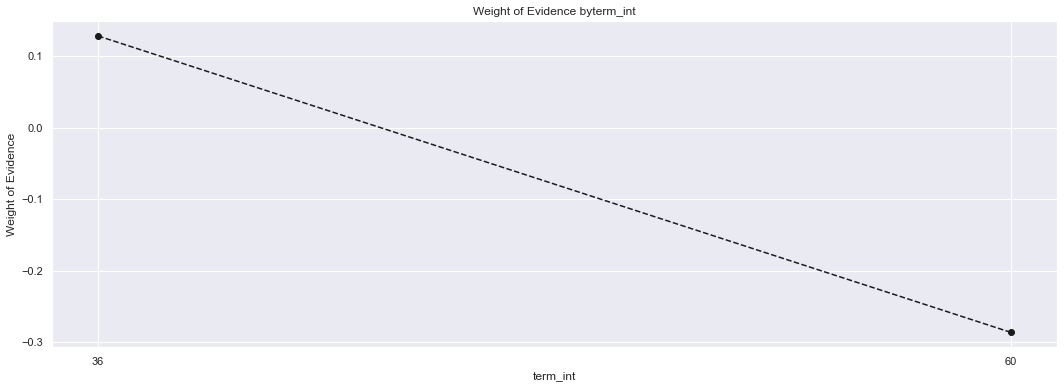

In [1221]:
plot_by_woe(df_temp)

In [1222]:
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int']==36,1,0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int']==60,1,0)


### Preprocessing Continious Variables - Employee length


In [1223]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7353,0.880457,0.082565,6474.0,879.0,0.081498,0.091382,-0.114472,NaN,NaN,0.005479
1,1.0,5968,0.892594,0.067013,5327.0,641.0,0.067059,0.066639,0.006278,0.012137,0.120750,0.005479
2,2.0,8295,0.887402,0.093143,7361.0,934.0,0.092663,0.097099,-0.046762,0.005192,0.053039,0.005479
3,3.0,7391,0.889325,0.082992,6573.0,818.0,0.082744,0.085040,-0.027373,0.001923,0.019389,0.005479
4,4.0,5555,0.889469,0.062376,4941.0,614.0,0.062199,0.063832,-0.025908,0.000144,0.001465,0.005479
5,5.0,6172,0.886261,0.069304,5470.0,702.0,0.068859,0.072981,-0.058136,0.003208,0.032228,0.005479
6,6.0,5225,0.878852,0.058670,4592.0,633.0,0.057806,0.065807,-0.129636,0.007409,0.071500,0.005479
7,7.0,5131,0.893588,0.057615,4585.0,546.0,0.057718,0.056763,0.016690,0.014736,0.146326,0.005479
8,8.0,4542,0.890137,0.051001,4043.0,499.0,0.050895,0.051876,-0.019100,0.003451,0.035790,0.005479
9,9.0,3621,0.892847,0.040659,3233.0,388.0,0.040698,0.040337,0.008924,0.002711,0.028024,0.005479


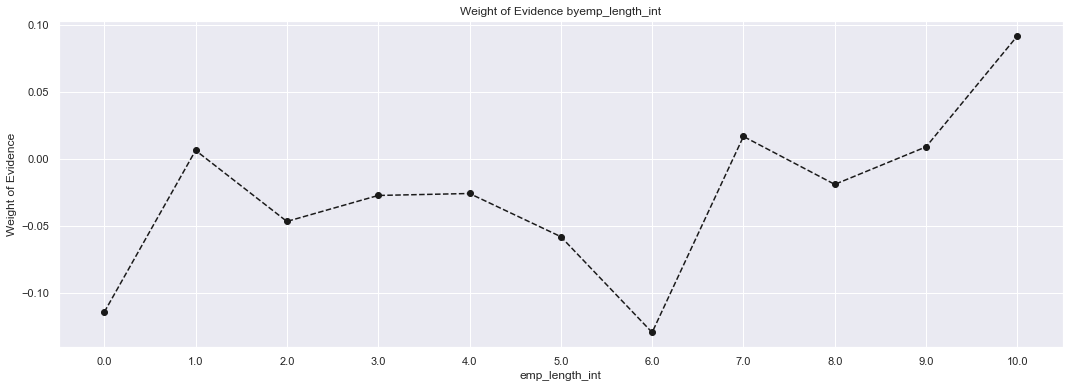

In [1224]:
plot_by_woe(df_temp)

In [1225]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)


### Preprocessing Continious Variables -Month since issue date


In [1226]:
df_inputs_prepr['mthns_since_earliest_cr_line'].unique()

array([188., 172., 189., 112., 374., 207., 332., 266., 383., 269., 328.,
       237., 293., 242., 228., 287., 231., 206., 263., 167., 239., 134.,
       441., 195., 127., 286., 192., 518., 170., 147., 150., 252., 202.,
       197., 190., 300., 233., 220., 416., 225., 217., 200., 209., 587.,
       194., 262., 156., 227., 391., 141., 183., 302., 267., 312., 362.,
       216., 438., 249., 273., 182., 221., 187., 567., 245., 205., 347.,
       214., 299., 176., 397., 386., 253., 243., 398., 153., 466., 198.,
       229., 241., 180., 389., 181., 169., 261., 378., 324., 400., 232.,
       486., 123., 350., 549., 139., 244., 255., 126., 219., 175., 115.,
       413., 173., 210., 274., 354., 254., 327., 321., 323., 201., 171.,
       280., 443., 329., 294., 257., 223., 258., 259., 158., 348., 162.,
       168., 303., 313., 298., 320.,  91., 439., 174., 520., 251., 317.,
       144., 204., 246., 406., 119., 304., 279., 379., 230., 160., 305.,
        79., 196., 306., 333., 331., 256., 113., 34

In [1227]:
df_inputs_prepr['mthns_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mthns_since_earliest_cr_line'],50)

In [1228]:
df_inputs_prepr['mthns_since_earliest_cr_line_factor']

362514    (186.08, 196.36]
288564     (165.52, 175.8]
213591    (186.08, 196.36]
263083    (103.84, 114.12]
165001     (371.12, 381.4]
                ...       
115       (134.68, 144.96]
296284     (371.12, 381.4]
61777     (258.04, 268.32]
91763     (299.16, 309.44]
167512     (216.92, 227.2]
Name: mthns_since_earliest_cr_line_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(72.486, 83.28] < (83.28, 93.56] < (93.56, 103.84] < (103.84, 114.12] ... (545.88, 556.16] < (556.16, 566.44] < (566.44, 576.72] < (576.72, 587.0]]

In [1229]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'mthns_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

,mthns_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(72.486, 83.28]",216,0.930556,0.002316,201.0,15.0,0.002420,0.001472,0.497074,NaN,NaN,0.019018
1,"(83.28, 93.56]",474,0.909283,0.005083,431.0,43.0,0.005189,0.004220,0.206728,0.021273,0.290347,0.019018
2,"(93.56, 103.84]",588,0.862245,0.006305,507.0,81.0,0.006104,0.007949,-0.264119,0.047038,0.470846,0.019018
3,"(103.84, 114.12]",1029,0.856171,0.011035,881.0,148.0,0.010607,0.014524,-0.314335,0.006074,0.050216,0.019018
4,"(114.12, 124.4]",1632,0.868873,0.017501,1418.0,214.0,0.017072,0.021001,-0.207154,0.012702,0.107181,0.019018
5,"(124.4, 134.68]",2238,0.856122,0.023999,1916.0,322.0,0.023067,0.031600,-0.314737,0.012751,0.107583,0.019018
6,"(134.68, 144.96]",2613,0.873708,0.028021,2283.0,330.0,0.027485,0.032385,-0.164027,0.017587,0.150710,0.019018
7,"(144.96, 155.24]",3165,0.880885,0.033940,2788.0,377.0,0.033565,0.036997,-0.097346,0.007176,0.066682,0.019018
8,"(155.24, 165.52]",3558,0.890388,0.038155,3168.0,390.0,0.038140,0.038273,-0.003471,0.009503,0.093874,0.019018
9,"(165.52, 175.8]",4140,0.886957,0.044396,3672.0,468.0,0.044208,0.045927,-0.038157,0.003431,0.034686,0.019018


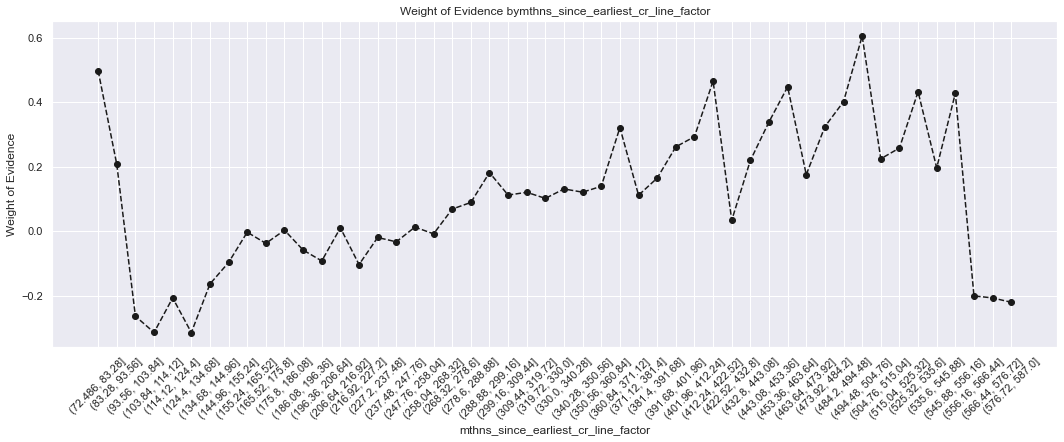

In [1230]:
plot_by_woe(df_temp, 45)

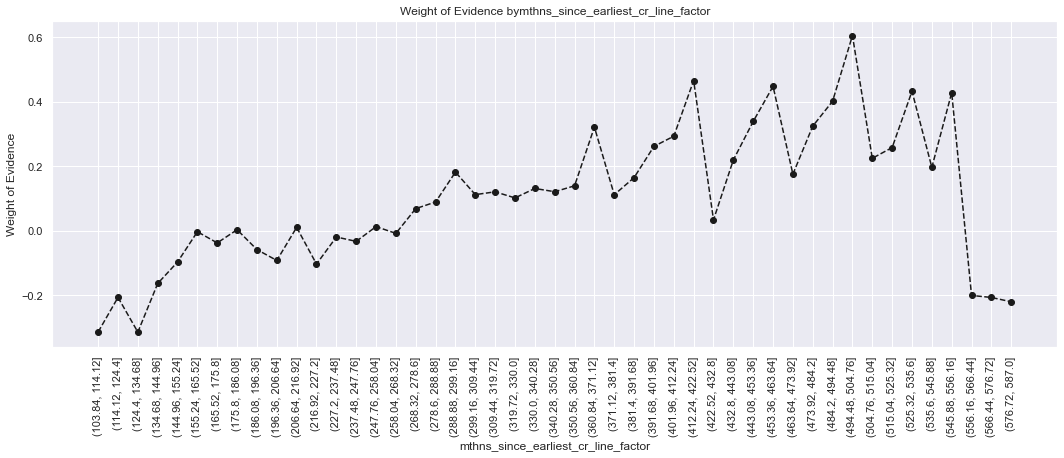

In [1231]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [1232]:
df_inputs_prepr['mthns_since_earliest_cr_line:<103'] = np.where(df_inputs_prepr['mthns_since_earliest_cr_line'].isin(range(72,103)),1,0)

## Preprocessing Continious Variables -Interest rate


In [1233]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


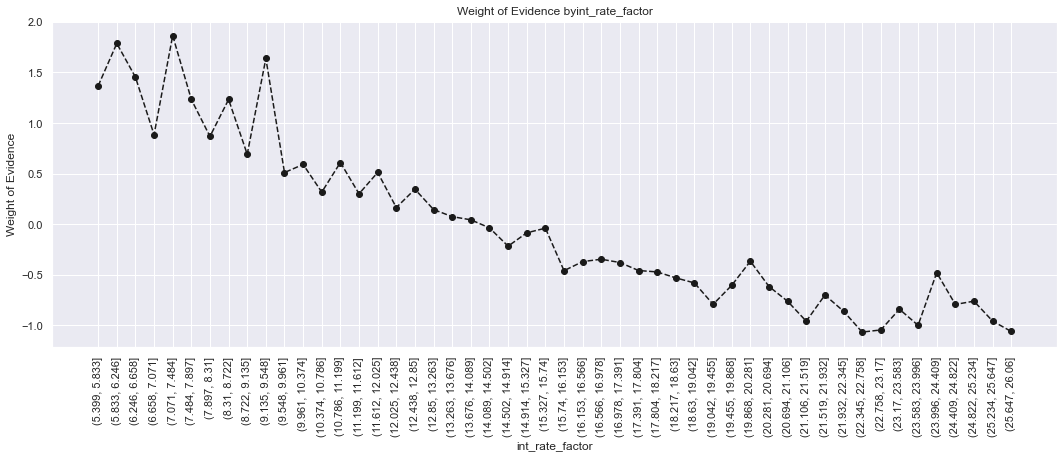

In [1234]:
plot_by_woe(df_temp,90)

In [1235]:
df_inputs_prepr['int_rate:<9.548'] = np.where(df_inputs_prepr['int_rate']<=9.548,1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate']>9.548) &(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate']>12.025) &(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate']>15.74) &(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:>20.281'] = np.where(df_inputs_prepr['int_rate']>20.281,1,0)


In [1236]:
df_inputs_prepr['funded_amnt_facotr'] = pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr,'funded_amnt_facotr',df_targets_prepr)
df_temp

,funded_amnt_facotr,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


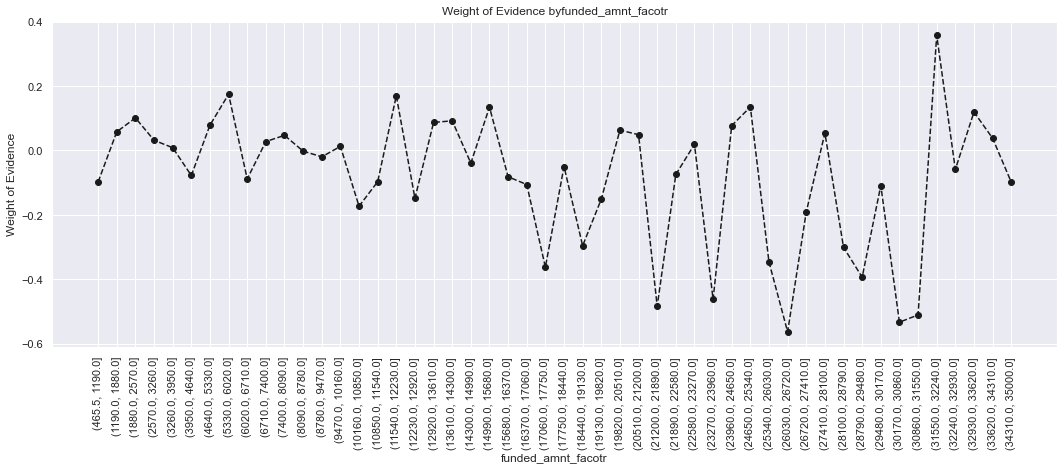

In [1237]:
plot_by_woe(df_temp,90)

# not to use funded amount 
# no association whatsoever between funded amount and WoE

### Preprocessing Continious Variables -Annual income

In [1238]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 154704.0]",89202,0.889038,0.956528,79304.0,9898.0,0.954711,0.971344,-0.017273,NaN,NaN,inf
1,"(154704.0, 304608.0]",3626,0.926641,0.038882,3360.0,266.0,0.040450,0.026104,0.437971,0.037603,0.455244,inf
2,"(304608.0, 454512.0]",282,0.929078,0.003024,262.0,20.0,0.003154,0.001963,0.474384,0.002437,0.036412,inf
3,"(454512.0, 604416.0]",86,0.965116,0.000922,83.0,3.0,0.000999,0.000294,1.222000,0.036038,0.747616,inf
4,"(604416.0, 754320.0]",23,0.956522,0.000247,22.0,1.0,0.000265,0.000098,0.992814,0.008595,0.229186,inf
5,"(754320.0, 904224.0]",18,0.944444,0.000193,17.0,1.0,0.000205,0.000098,0.734985,0.012077,0.257829,inf
6,"(904224.0, 1054128.0]",7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,0.055556,inf,inf
7,"(1054128.0, 1204032.0]",6,1.000000,0.000064,6.0,0.0,0.000072,0.000000,inf,0.000000,NaN,inf
8,"(1204032.0, 1353936.0]",2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098229,0.500000,inf,inf
9,"(1353936.0, 1503840.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.500000,inf,inf


In [1239]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62620,0.877930,0.671485,54976.0,7644.0,0.661835,0.750147,-0.125253,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285043,24328.0,2254.0,0.292876,0.221197,0.280693,0.037275,0.405946,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031269,2701.0,215.0,0.032516,0.021099,0.432511,0.011063,0.151818,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460669,0.001900,0.028159,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485769,0.001656,0.025100,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457059,0.001897,0.028710,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140450,0.034336,0.683391,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367507,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386678,0.076923,inf,inf


In [1240]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000,:]

In [1241]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-1241-69e75ce3391a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.761905,0.000958,64.0,20.0,0.000822,0.002043,-0.911144,0.238095,inf,inf
2,"(10208.0, 12912.0]",123,0.780488,0.001403,96.0,27.0,0.001232,0.002758,-0.805783,0.018583,0.105361,inf
3,"(12912.0, 15616.0]",304,0.851974,0.003467,259.0,45.0,0.003325,0.004597,-0.324129,0.071486,0.481654,inf
4,"(15616.0, 18320.0]",383,0.827676,0.004368,317.0,66.0,0.004069,0.006743,-0.505047,0.024297,0.180919,inf
5,"(18320.0, 21024.0]",733,0.840382,0.008359,616.0,117.0,0.007907,0.011953,-0.413221,0.012706,0.091826,inf
6,"(21024.0, 23728.0]",704,0.846591,0.008028,596.0,108.0,0.007651,0.011034,-0.366185,0.006209,0.047036,inf
7,"(23728.0, 26432.0]",1785,0.861064,0.020356,1537.0,248.0,0.019730,0.025337,-0.250135,0.014474,0.116050,inf
8,"(26432.0, 29136.0]",1355,0.853137,0.015452,1156.0,199.0,0.014839,0.020331,-0.314878,0.007928,0.064743,inf
9,"(29136.0, 31840.0]",2292,0.854276,0.026138,1958.0,334.0,0.025134,0.034123,-0.305757,0.001139,0.009122,inf


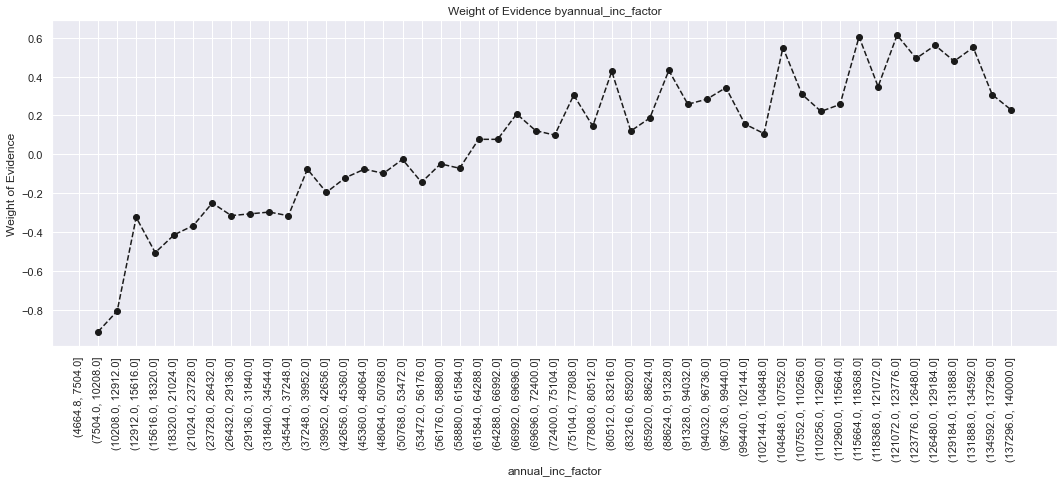

In [1242]:
plot_by_woe(df_temp,90)

In [1243]:
df_inputs_prepr['annual_inc:<20'] = np.where(df_inputs_prepr['annual_inc']<=20000,1,0)
df_inputs_prepr['annual_inc:20000-30000'] = np.where((df_inputs_prepr['annual_inc']>20000) &(df_inputs_prepr['annual_inc']<=30000),1,0)
df_inputs_prepr['annual_inc:30000-40000'] = np.where((df_inputs_prepr['annual_inc']>30000) &(df_inputs_prepr['annual_inc']<=40000),1,0)
df_inputs_prepr['annual_inc:40000-50000'] = np.where((df_inputs_prepr['annual_inc']>40000) &(df_inputs_prepr['annual_inc']<=50000),1,0)
df_inputs_prepr['annual_inc:50000-60000'] = np.where((df_inputs_prepr['annual_inc']>50000) &(df_inputs_prepr['annual_inc']<=60000),1,0)
df_inputs_prepr['annual_inc:60000-70000'] = np.where((df_inputs_prepr['annual_inc']>60000) &(df_inputs_prepr['annual_inc']<=70000),1,0)
df_inputs_prepr['annual_inc:70000-80000'] = np.where((df_inputs_prepr['annual_inc']>70000) &(df_inputs_prepr['annual_inc']<=80000),1,0)
df_inputs_prepr['annual_inc:80000-90000'] = np.where((df_inputs_prepr['annual_inc']>80000) &(df_inputs_prepr['annual_inc']<=90000),1,0)
df_inputs_prepr['annual_inc:90000-100000'] = np.where((df_inputs_prepr['annual_inc']>90000) &(df_inputs_prepr['annual_inc']<=100000),1,0)
df_inputs_prepr['annual_inc:100000-120000'] = np.where((df_inputs_prepr['annual_inc']>100000) &(df_inputs_prepr['annual_inc']<=120000),1,0)
df_inputs_prepr['annual_inc:120000-140000'] = np.where((df_inputs_prepr['annual_inc']>120000) &(df_inputs_prepr['annual_inc']<=140000),1,0)
df_inputs_prepr['annual_inc:>140000'] = np.where((df_inputs_prepr['annual_inc']>140000),1,0)



In [1244]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

<ipython-input-1244-c1fc995cb8e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,0.011729,0.106981,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,0.006621,0.064453,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,0.008789,0.090864,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,0.011789,0.120464,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,0.009032,0.091258,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,0.005269,0.056415,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,0.002882,0.031174,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,0.000857,0.009183,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,0.004350,0.045968,inf


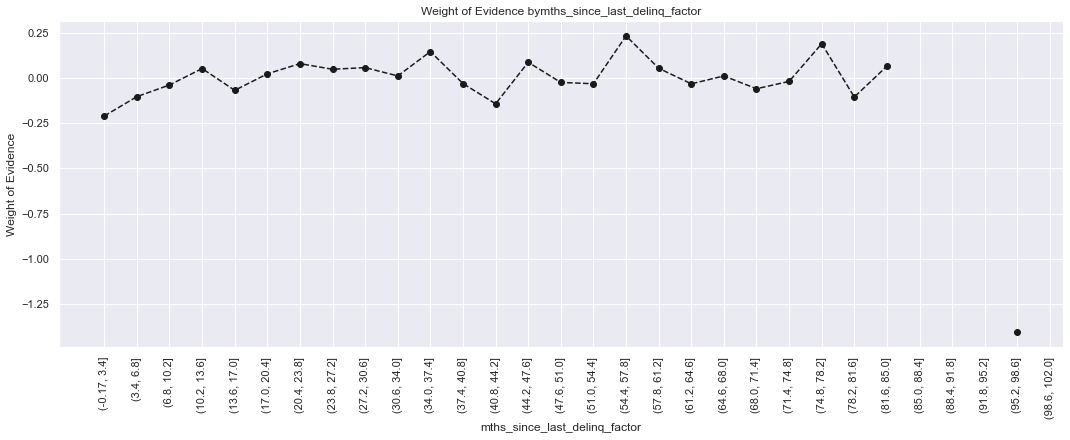

In [1245]:
plot_by_woe(df_temp,90)

In [1246]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq']>0) &(df_inputs_prepr['mths_since_last_delinq']<=3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=4) &(df_inputs_prepr['mths_since_last_delinq']<=30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=31) &(df_inputs_prepr['mths_since_last_delinq']<=56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=57),1,0)


### Preprocessing the Test Dataset

In [1247]:
# loan_data_inputs_train = df_inputs_prepr
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_targets_train.to_csv('loan_data_targets_train.csv')

In [1248]:
loan_data_inputs_test = df_inputs_prepr
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')